### 노선별 분석

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
from PIL import Image

In [2]:
plt.rcParams['font.family']='HYGPRM'

In [3]:
df1=pd.read_csv("MetroData/2201.csv")
df2=pd.read_csv("MetroData/2202.csv")
df3=pd.read_csv("MetroData/2203.csv")
df4=pd.read_csv("MetroData/2204.csv")
df5=pd.read_csv("MetroData/2205.csv")
df6=pd.read_csv("MetroData/2206.csv")
df7=pd.read_csv("MetroData/2207.csv")
df8=pd.read_csv("MetroData/2208.csv")
df9=pd.read_csv("MetroData/2022.csv")

### 노선 종류 
 - 총 26노선
 - 신림선은 5월 28일 개통으로 1~4월까지 정보 없음

In [4]:
df9.노선.unique()

array(['3호선', '경원선', '1호선', '2호선', '경의선', '분당선', '중앙선', '장항선', '일산선',
       '우이신설선', '안산선', '수인선', '과천선', '공항철도 1호선', '경춘선', '경인선', '경부선',
       '경강선', '9호선2~3단계', '9호선', '8호선', '7호선', '6호선', '5호선', '4호선', '신림선'],
      dtype=object)

### 노선별 승객 데이터

In [5]:
df9[["노선", "승차승객", "하차승객", "총 승객"]].groupby(["노선"]).mean()

,승차승객,하차승객,총 승객
노선,,,
1호선,19378.279835,18952.500000,38330.779835
2호선,23320.706337,23624.886584,46945.592922
3호선,13119.977854,13093.300135,26213.277988
4호선,15882.019943,16064.927509,31946.947452
5호선,9731.628160,9676.739638,19408.367798
6호선,7509.098823,7407.034430,14916.133253
7호선,11809.916101,11628.988533,23438.904634
8호선,8923.063329,9002.865341,17925.928669
9호선,9467.898436,9572.574156,19040.472593


In [6]:
df9[["노선", "승차승객", "하차승객", "총 승객"]].groupby(["노선"]).sum()

,승차승객,하차승객,총 승객
노선,,,
1호선,47089220,46054575,93143795
2호선,283346582,287042372,570388954
3호선,107229579,107011542,214241121
4호선,100342602,101498212,201840814
5호선,132427996,131681073,264109069
6호선,68918509,67981762,136900271
7호선,123590772,121697365,245288137
8호선,39029479,39378533,78408012
9호선,57517483,58153388,115670871


### 많은 순으로 정렬

In [7]:
df9[["노선", "승차승객", "하차승객", "총 승객"]].groupby(["노선"]).mean().sort_values(by="총 승객", ascending=False)

,승차승객,하차승객,총 승객
노선,,,
2호선,23320.706337,23624.886584,46945.592922
1호선,19378.279835,18952.500000,38330.779835
4호선,15882.019943,16064.927509,31946.947452
3호선,13119.977854,13093.300135,26213.277988
경인선,12148.306379,11868.020370,24016.326749
7호선,11809.916101,11628.988533,23438.904634
과천선,11153.318416,11045.965021,22199.283436
경부선,10015.789490,9949.541522,19965.331012
5호선,9731.628160,9676.739638,19408.367798


In [8]:
df9[["노선", "승차승객", "하차승객", "총 승객"]].groupby(["노선"]).sum().sort_values(by="총 승객", ascending=False)

,승차승객,하차승객,총 승객
노선,,,
2호선,283346582,287042372,570388954
5호선,132427996,131681073,264109069
7호선,123590772,121697365,245288137
3호선,107229579,107011542,214241121
4호선,100342602,101498212,201840814
경부선,94919637,94291805,189211442
분당선,76857721,79344766,156202487
6호선,68918509,67981762,136900271
경인선,59040769,57678579,116719348


### 결과확인
#### 총 승객 평균 정보
 - 전체 이용자 수와 다른 부분이 있다
 - 평균 총 승객은 2호선이 가장 많고, 경춘선이 가장 적다
 - 2호선, 1호선, 4호선, 3호선, 경인선 순으로 많다
 - 경춘선, 장항선, 경강선, 수인선, 신림선 순으로 적다
 
#### 총 승객 합 정보
 - 2호선, 5호선, 7호선, 3호선, 4호선 순으로 이용자가 많다
 - 신림선, 장항선, 경강선, 경춘선, 우이신설선 순으로 이용자가 적다
 - 2호선의 이용자가 압도적으로 많다
 
#### 참고사항
 - 신림선의 승객의 합이 가장 적은 것은 최근 개통의 영향

### 노선별 그래프

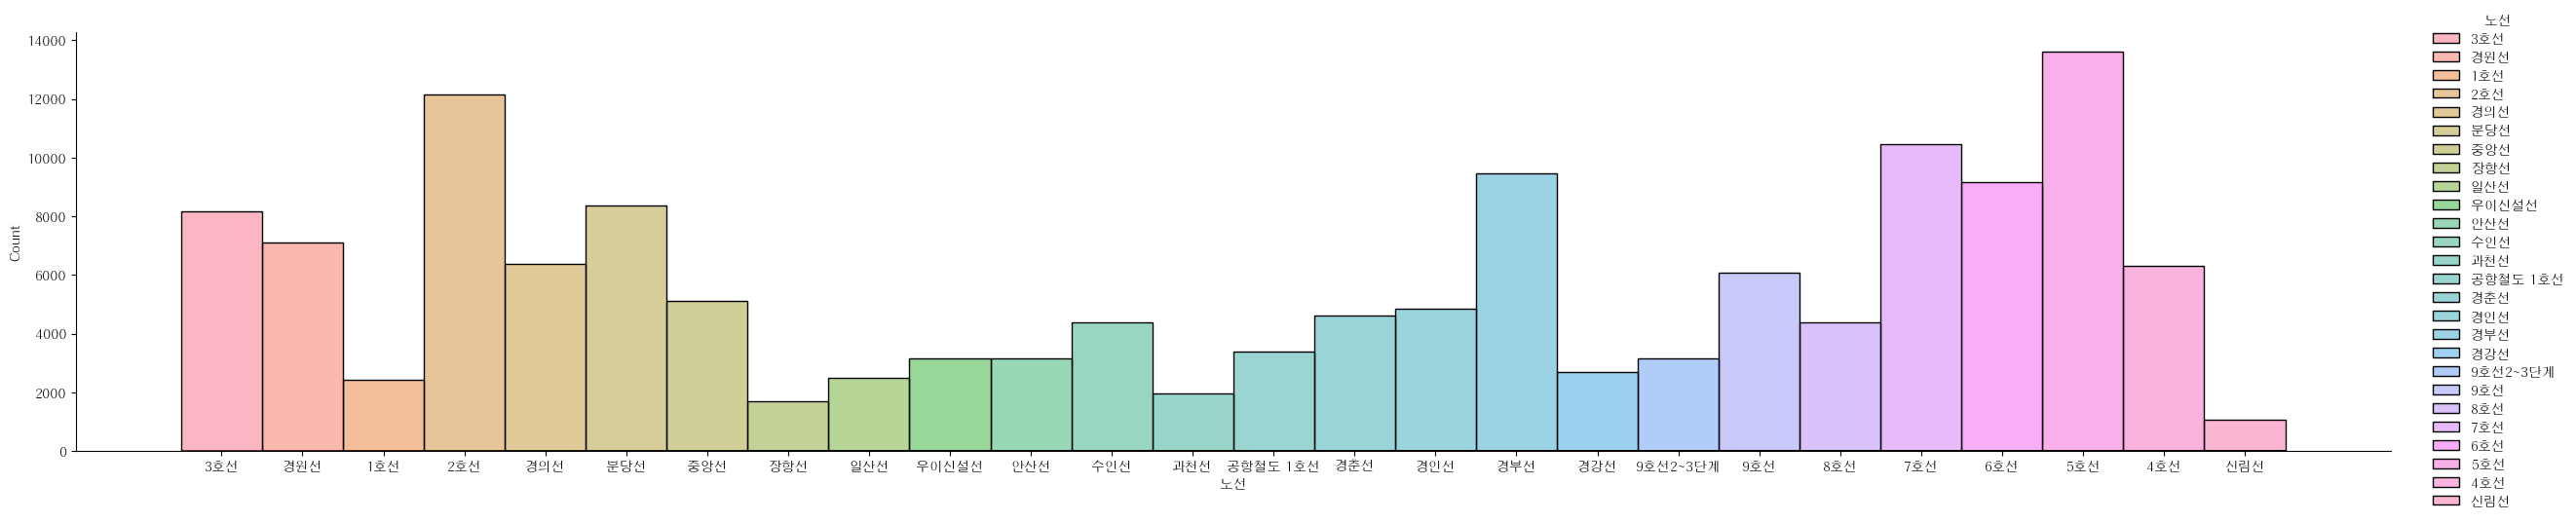

In [9]:
sns.displot(data=df9, x="노선", aspect=5, hue="노선")

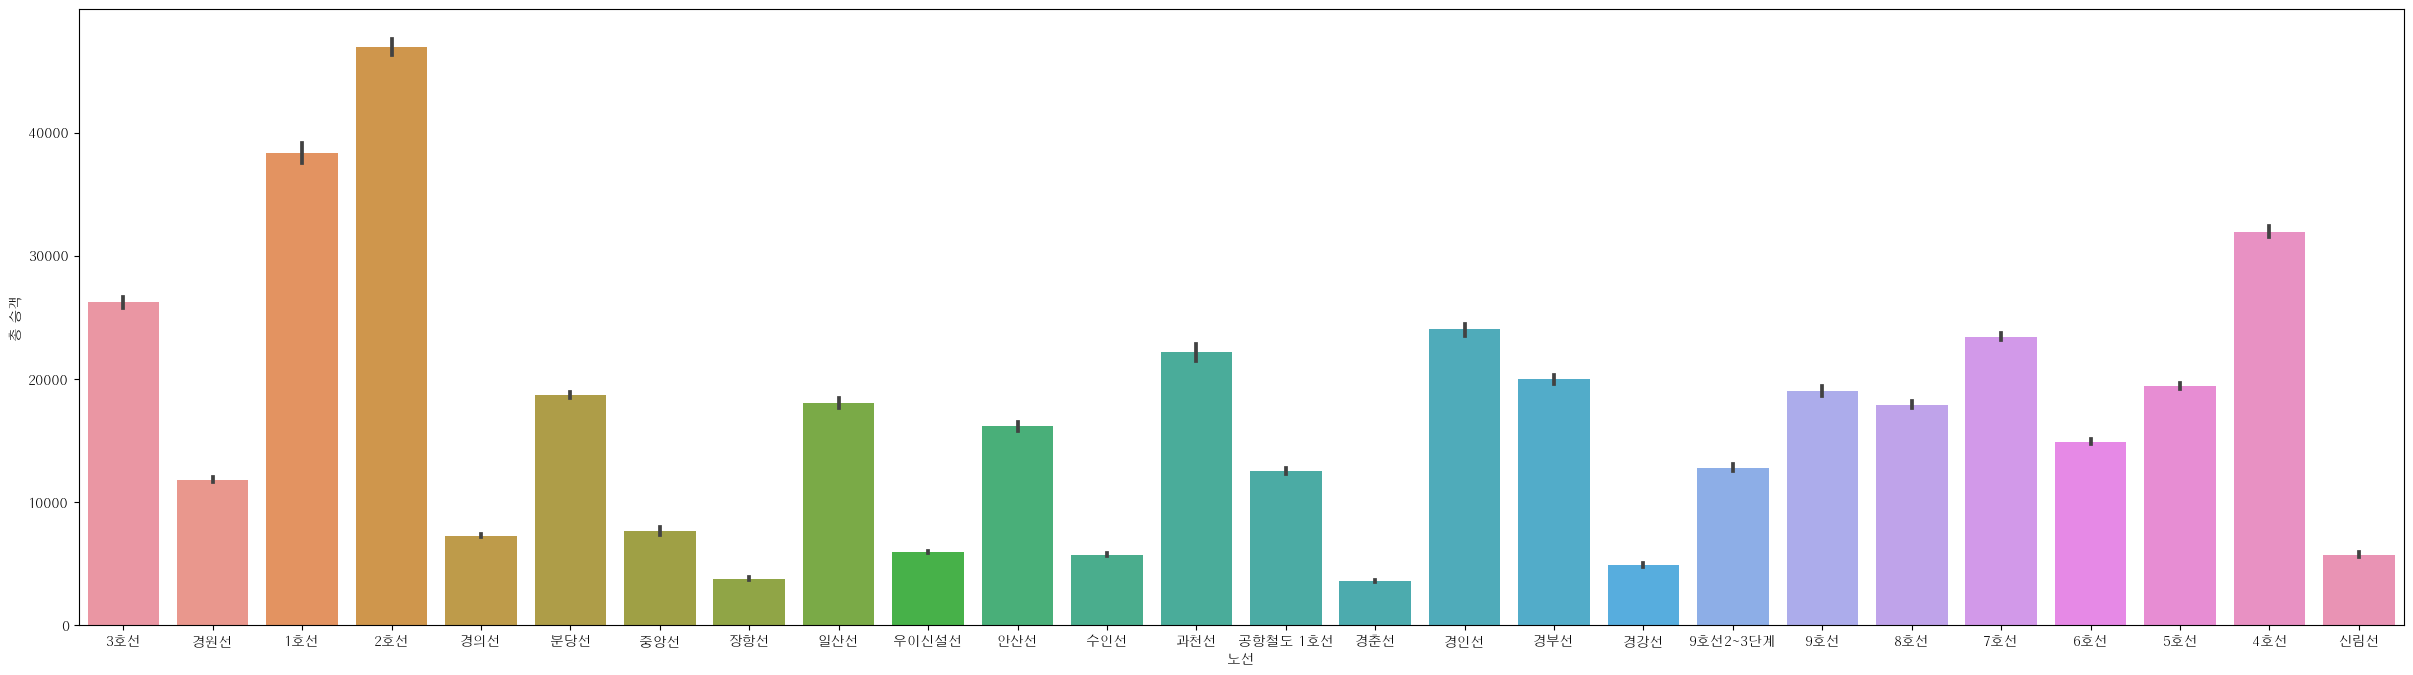

In [10]:
plt.subplots(figsize=(30, 8))
sns.barplot(data=df9, x="노선", y="총 승객")
plt.show()

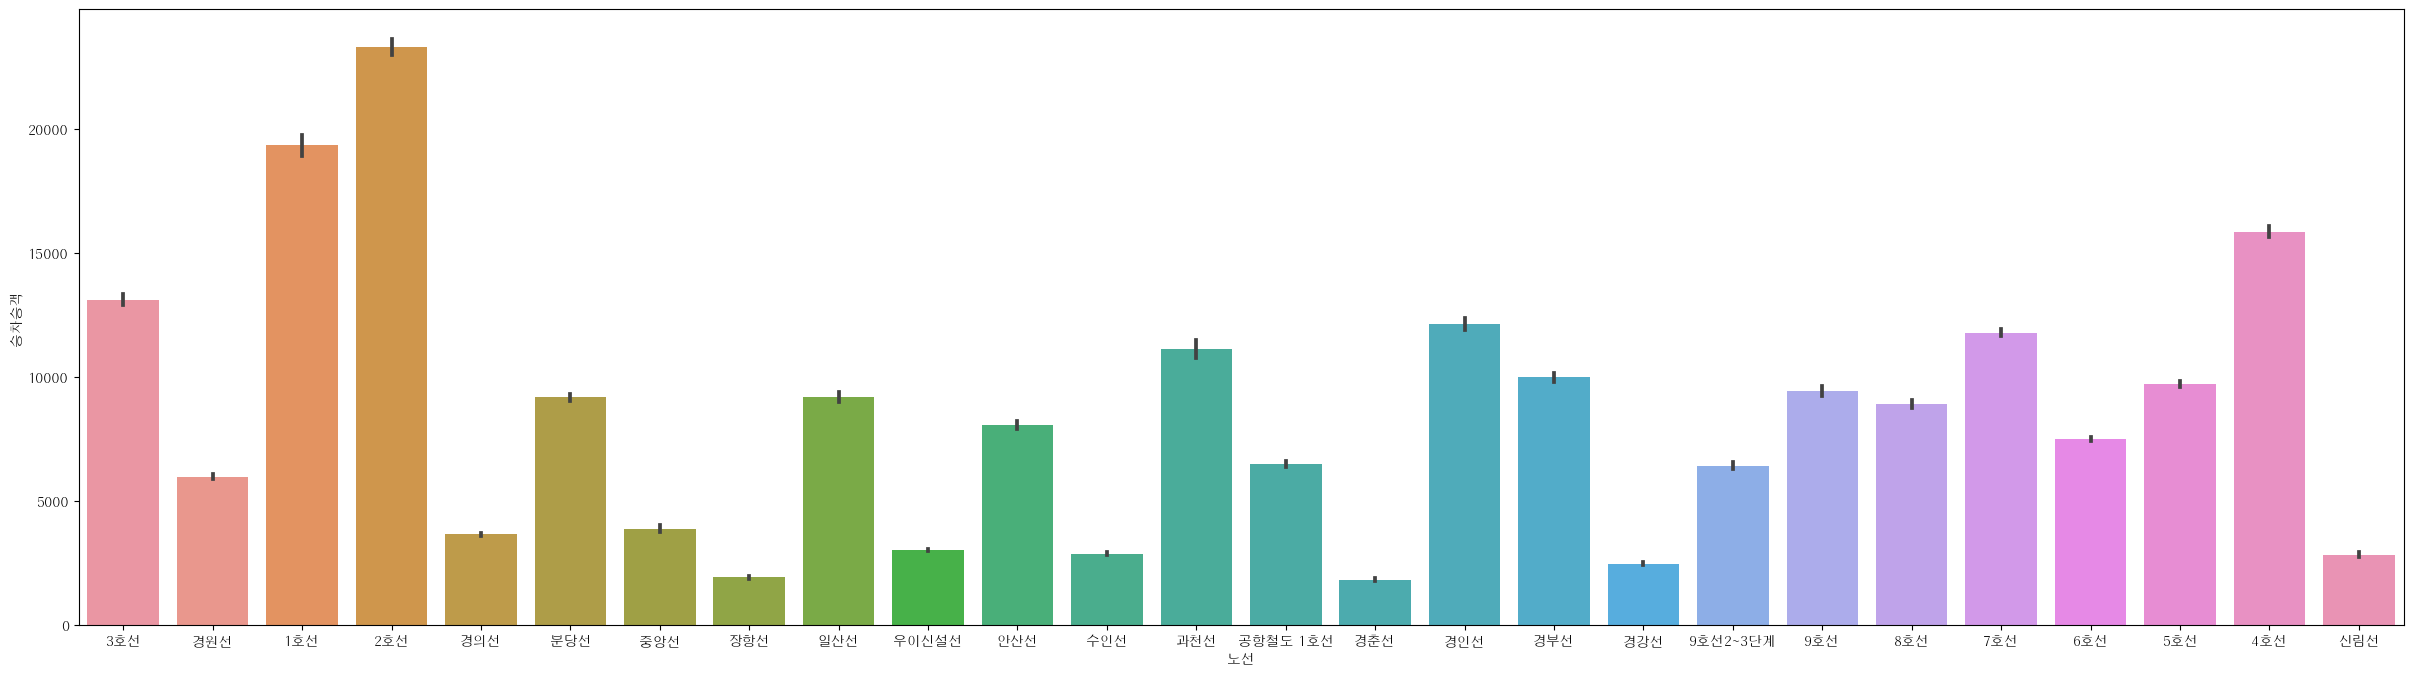

In [11]:
plt.subplots(figsize=(30, 8))
sns.barplot(data=df9, x="노선", y="승차승객")
plt.show()

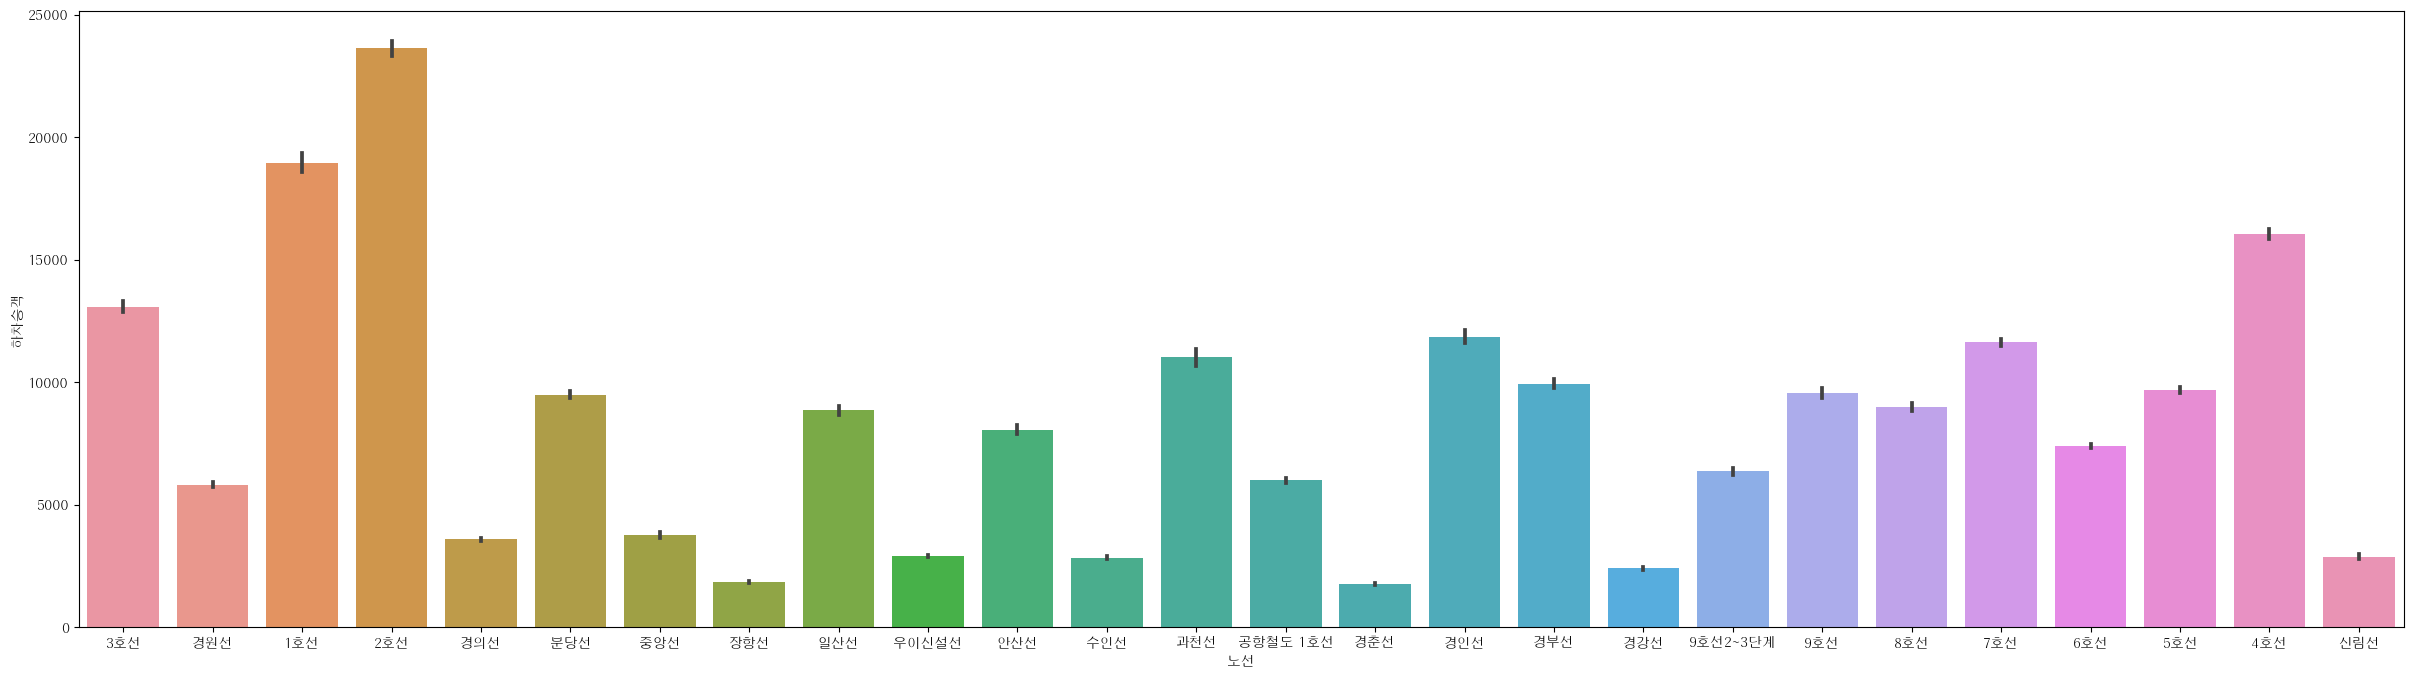

In [12]:
plt.subplots(figsize=(30, 8))
sns.barplot(data=df9, x="노선", y="하차승객")
plt.show()

C:\Users\KB\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


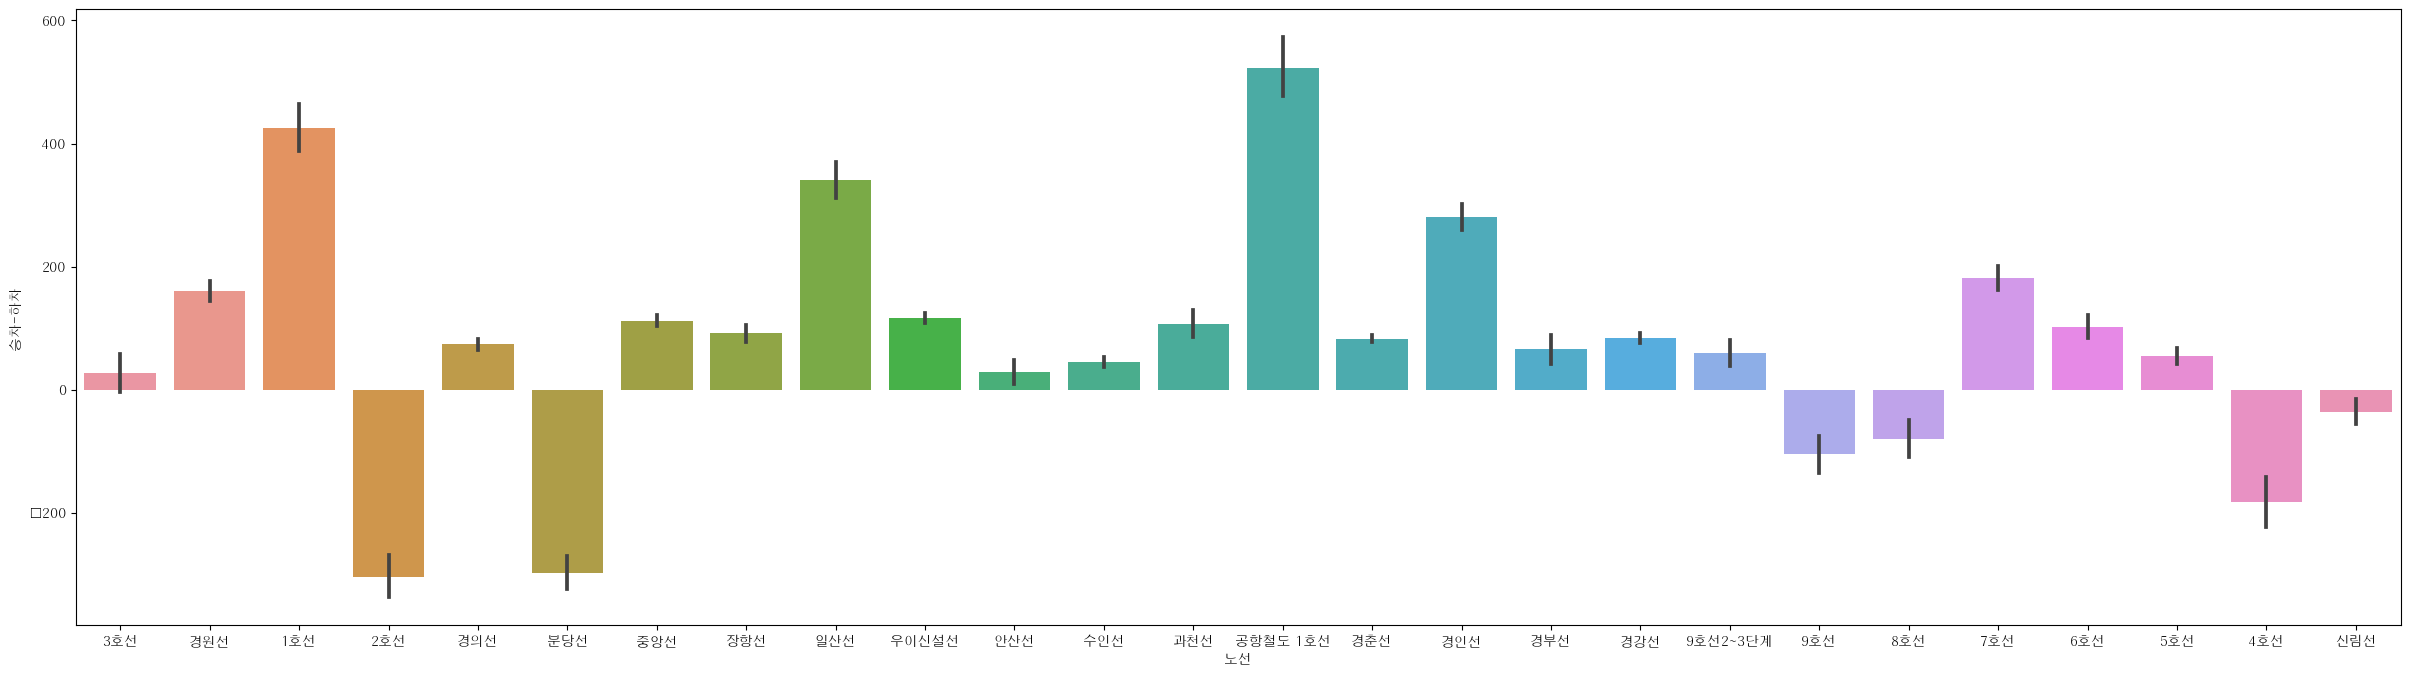

In [13]:
plt.subplots(figsize=(30, 8))
sns.barplot(data=df9, x="노선", y="승차-하차")
plt.show()

### 그래프 분석
 - 1호선, 4호선, 일산선, 안산선은 데이터에 등장한 값에 비해 총 승객 수가 많다
 - 2호선, 분당선, 9호선, 8호선, 4호선, 신림선은 승차한 승객보다 하차한 승객이 더 많다

In [14]:
df9.노선.value_counts().sort_values(ascending=False)

5호선         13608
2호선         12150
7호선         10465
경부선          9477
6호선          9178
분당선          8355
3호선          8173
경원선          7116
경의선          6380
4호선          6318
9호선          6075
중앙선          5103
경인선          4860
경춘선          4617
8호선          4374
수인선          4374
공항철도 1호선     3402
9호선2~3단계     3159
안산선          3159
우이신설선        3159
경강선          2673
일산선          2488
1호선          2430
과천선          1944
장항선          1701
신림선          1056
Name: 노선, dtype: int64

### 노선 카운트
 - 1호선, 4호선의 총 승객 대비 카운트 수가 적다
 - 결과를 보면 1호선은 다른 노선에 비해서도 등장한 수가 적다
 - 노선에 속한 역의 수가 많을수록 카운트도 많아진다
 - 1호선에 속한 노선의 수는 적은 것으로 추정된다
 - 다만, 1호선에 속한 역을 이용하는 사람은 전반적으로 높은 것으로 추정된다

### 노선별 승객 그래프

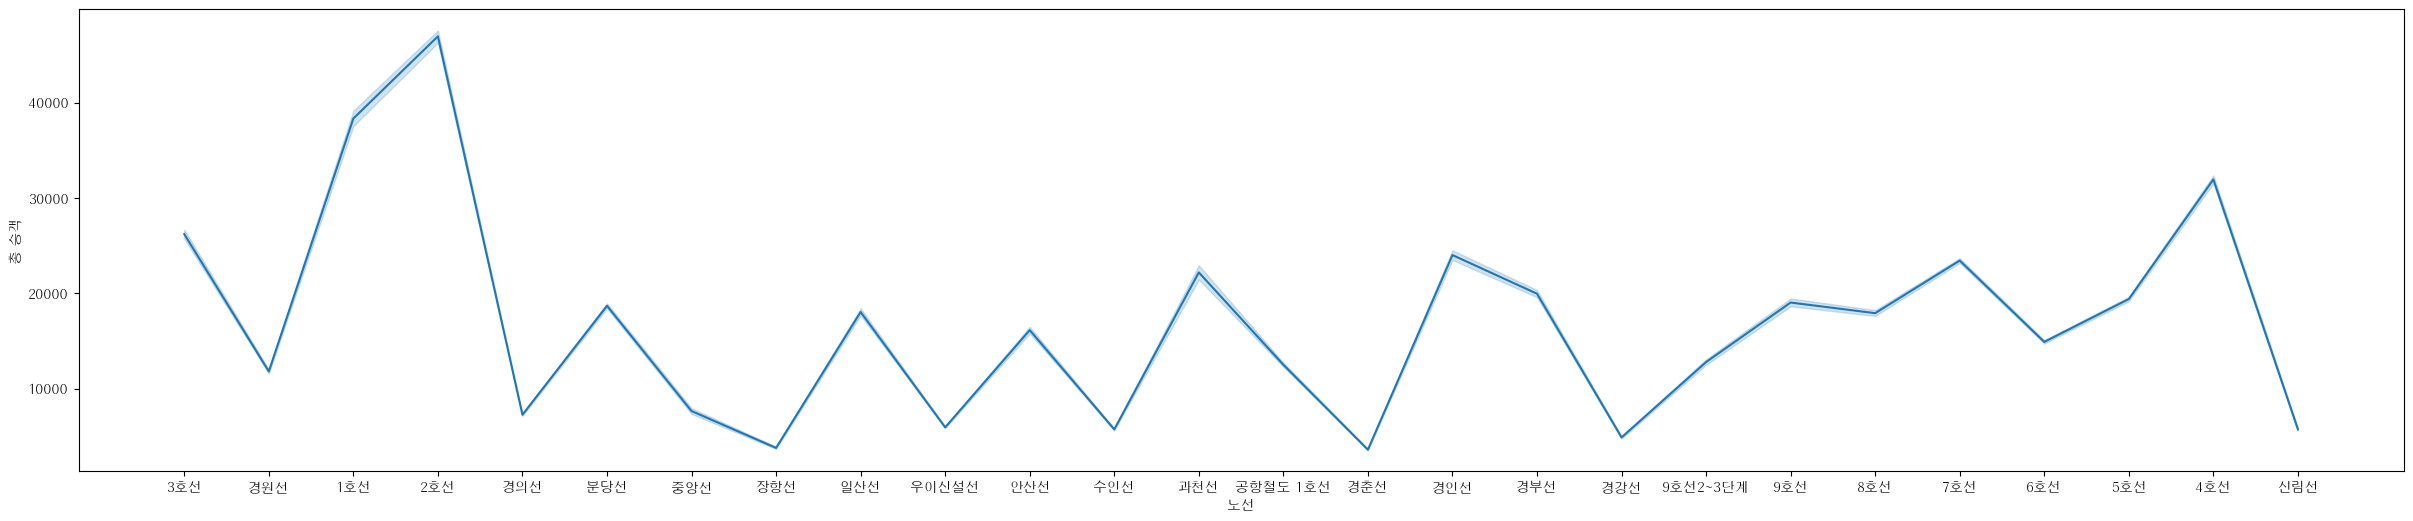

In [15]:
plt.subplots(figsize=(30, 6))
sns.lineplot(data=df9, x="노선", y="총 승객")
plt.show()

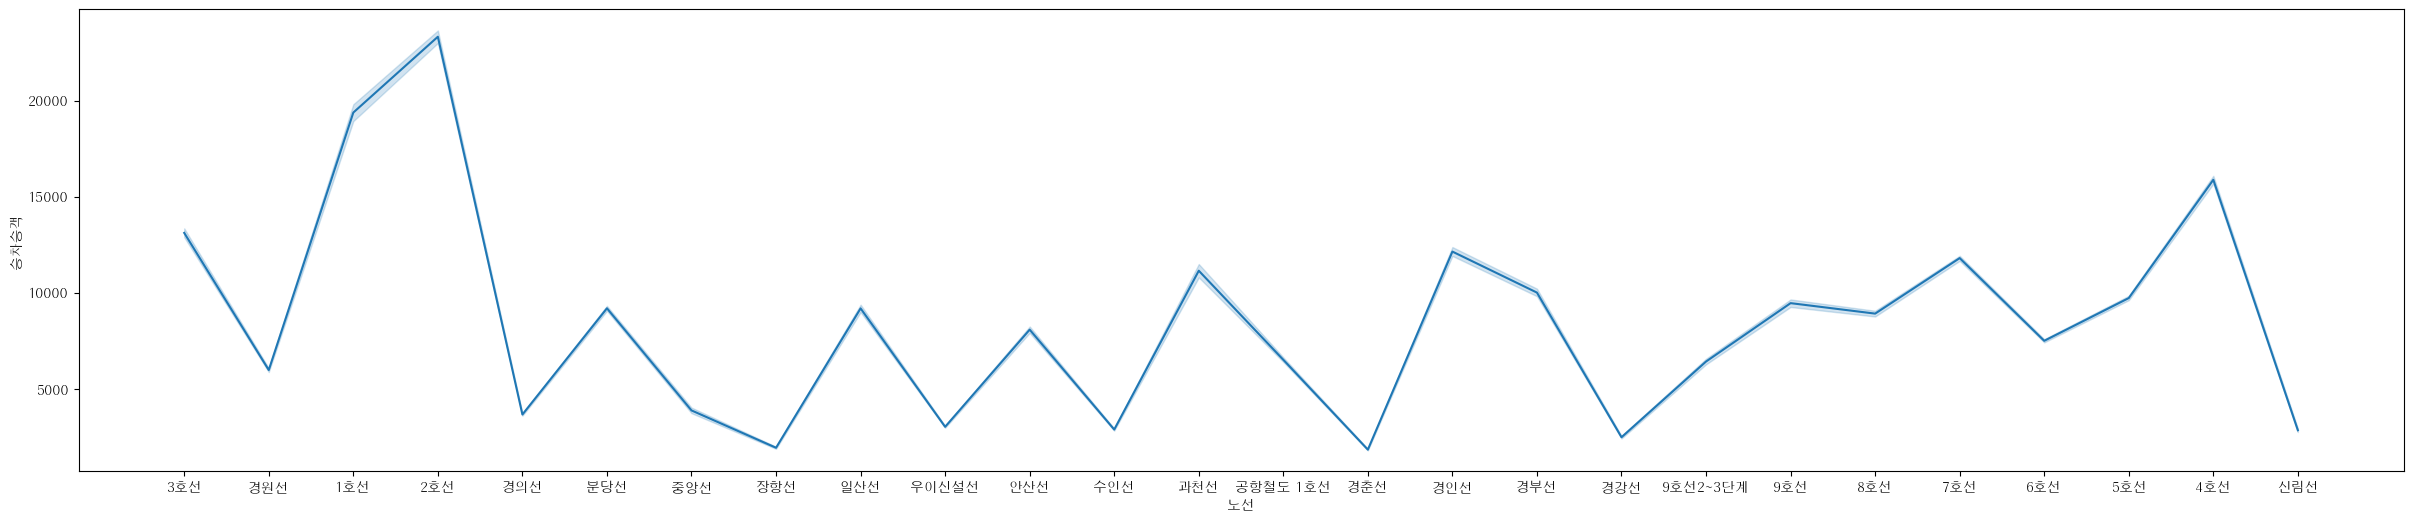

In [16]:
plt.subplots(figsize=(30, 6))
sns.lineplot(data=df9, x="노선", y="승차승객")
plt.show()

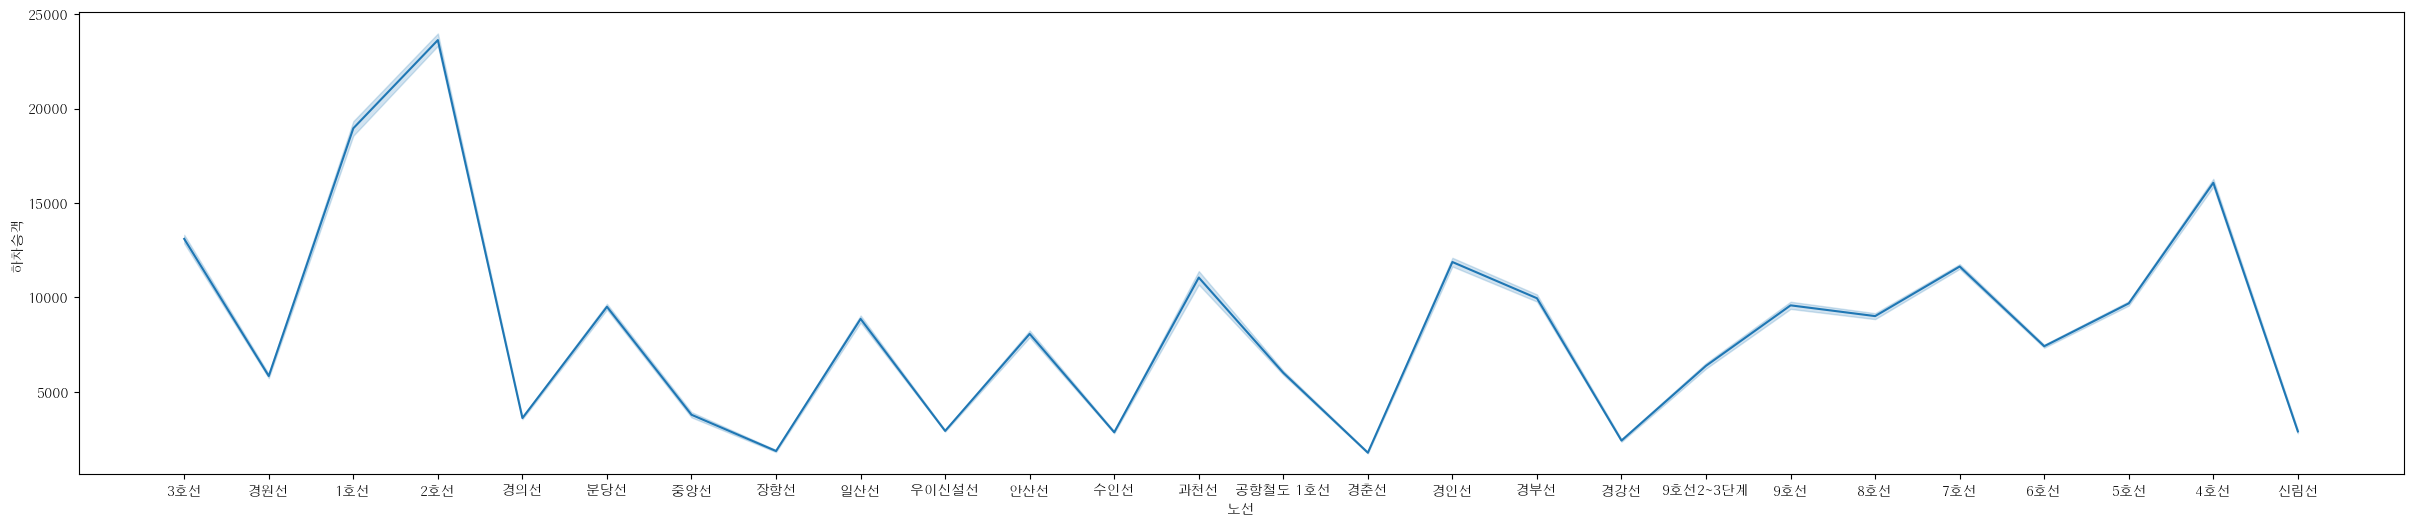

In [17]:
plt.subplots(figsize=(30, 6))
sns.lineplot(data=df9, x="노선", y="하차승객")
plt.show()

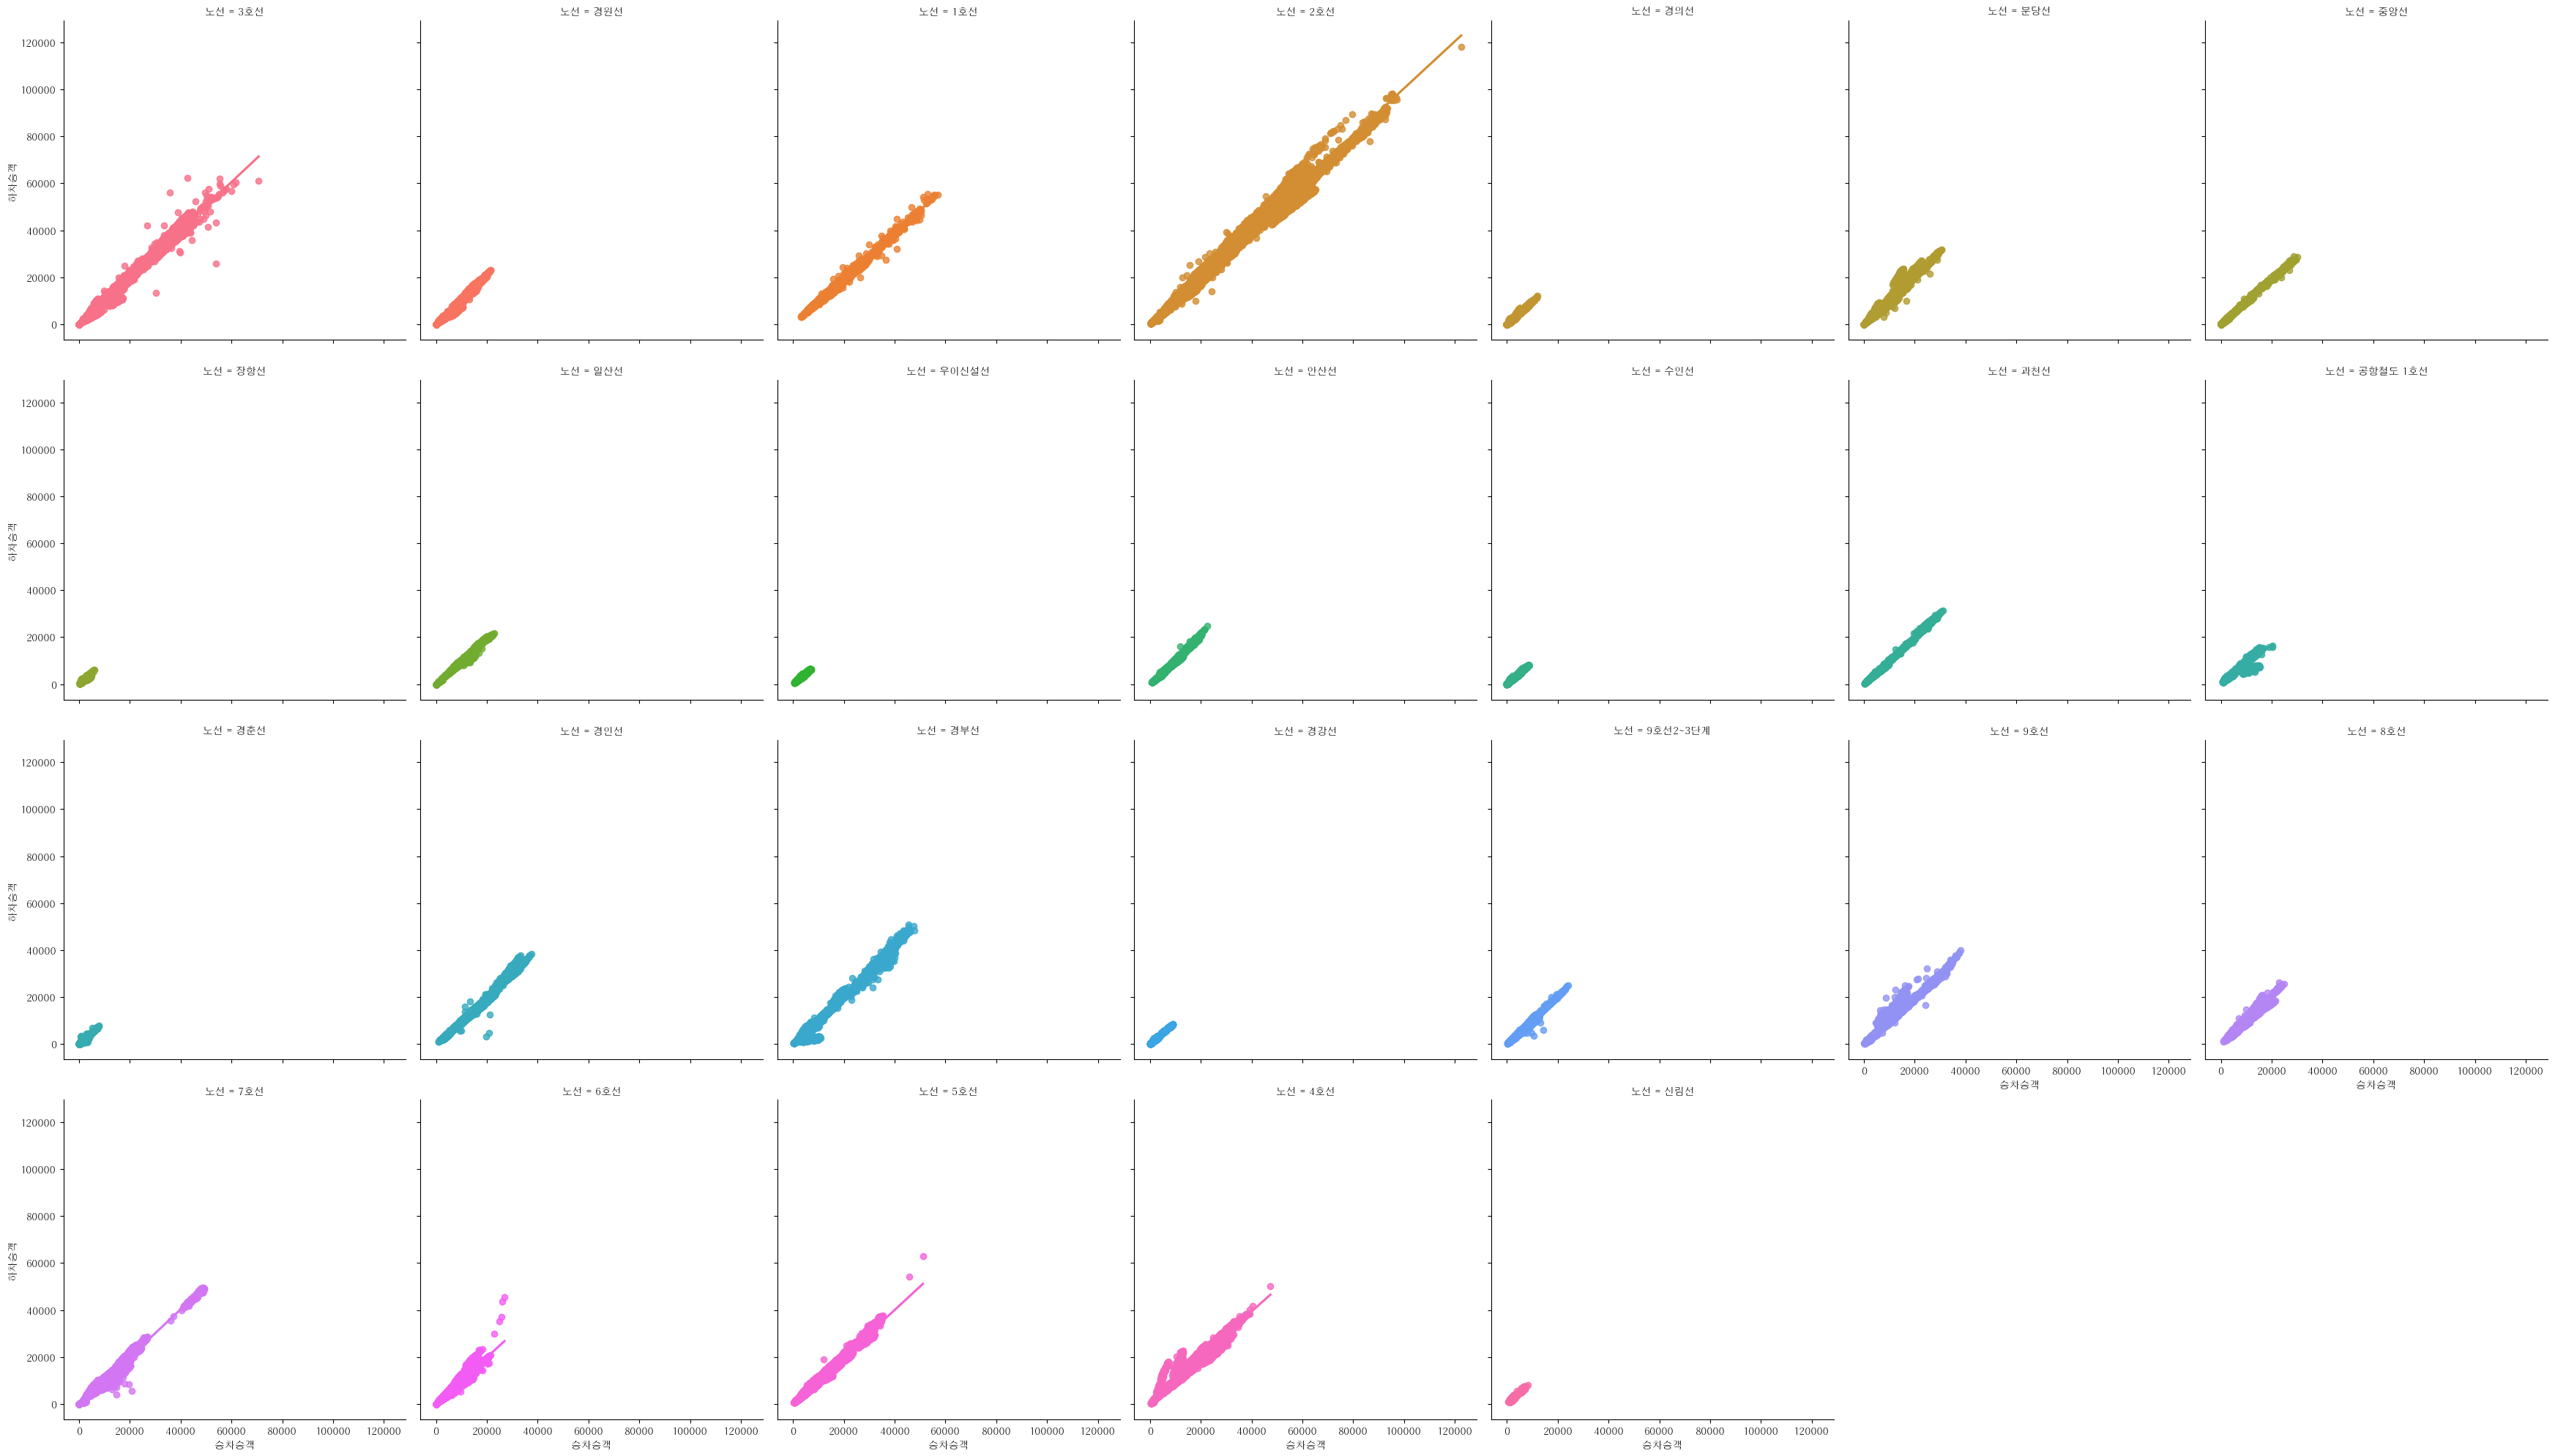

In [18]:
sns.lmplot(data=df9, x="승차승객", y="하차승객", hue="노선", col="노선", col_wrap=7)

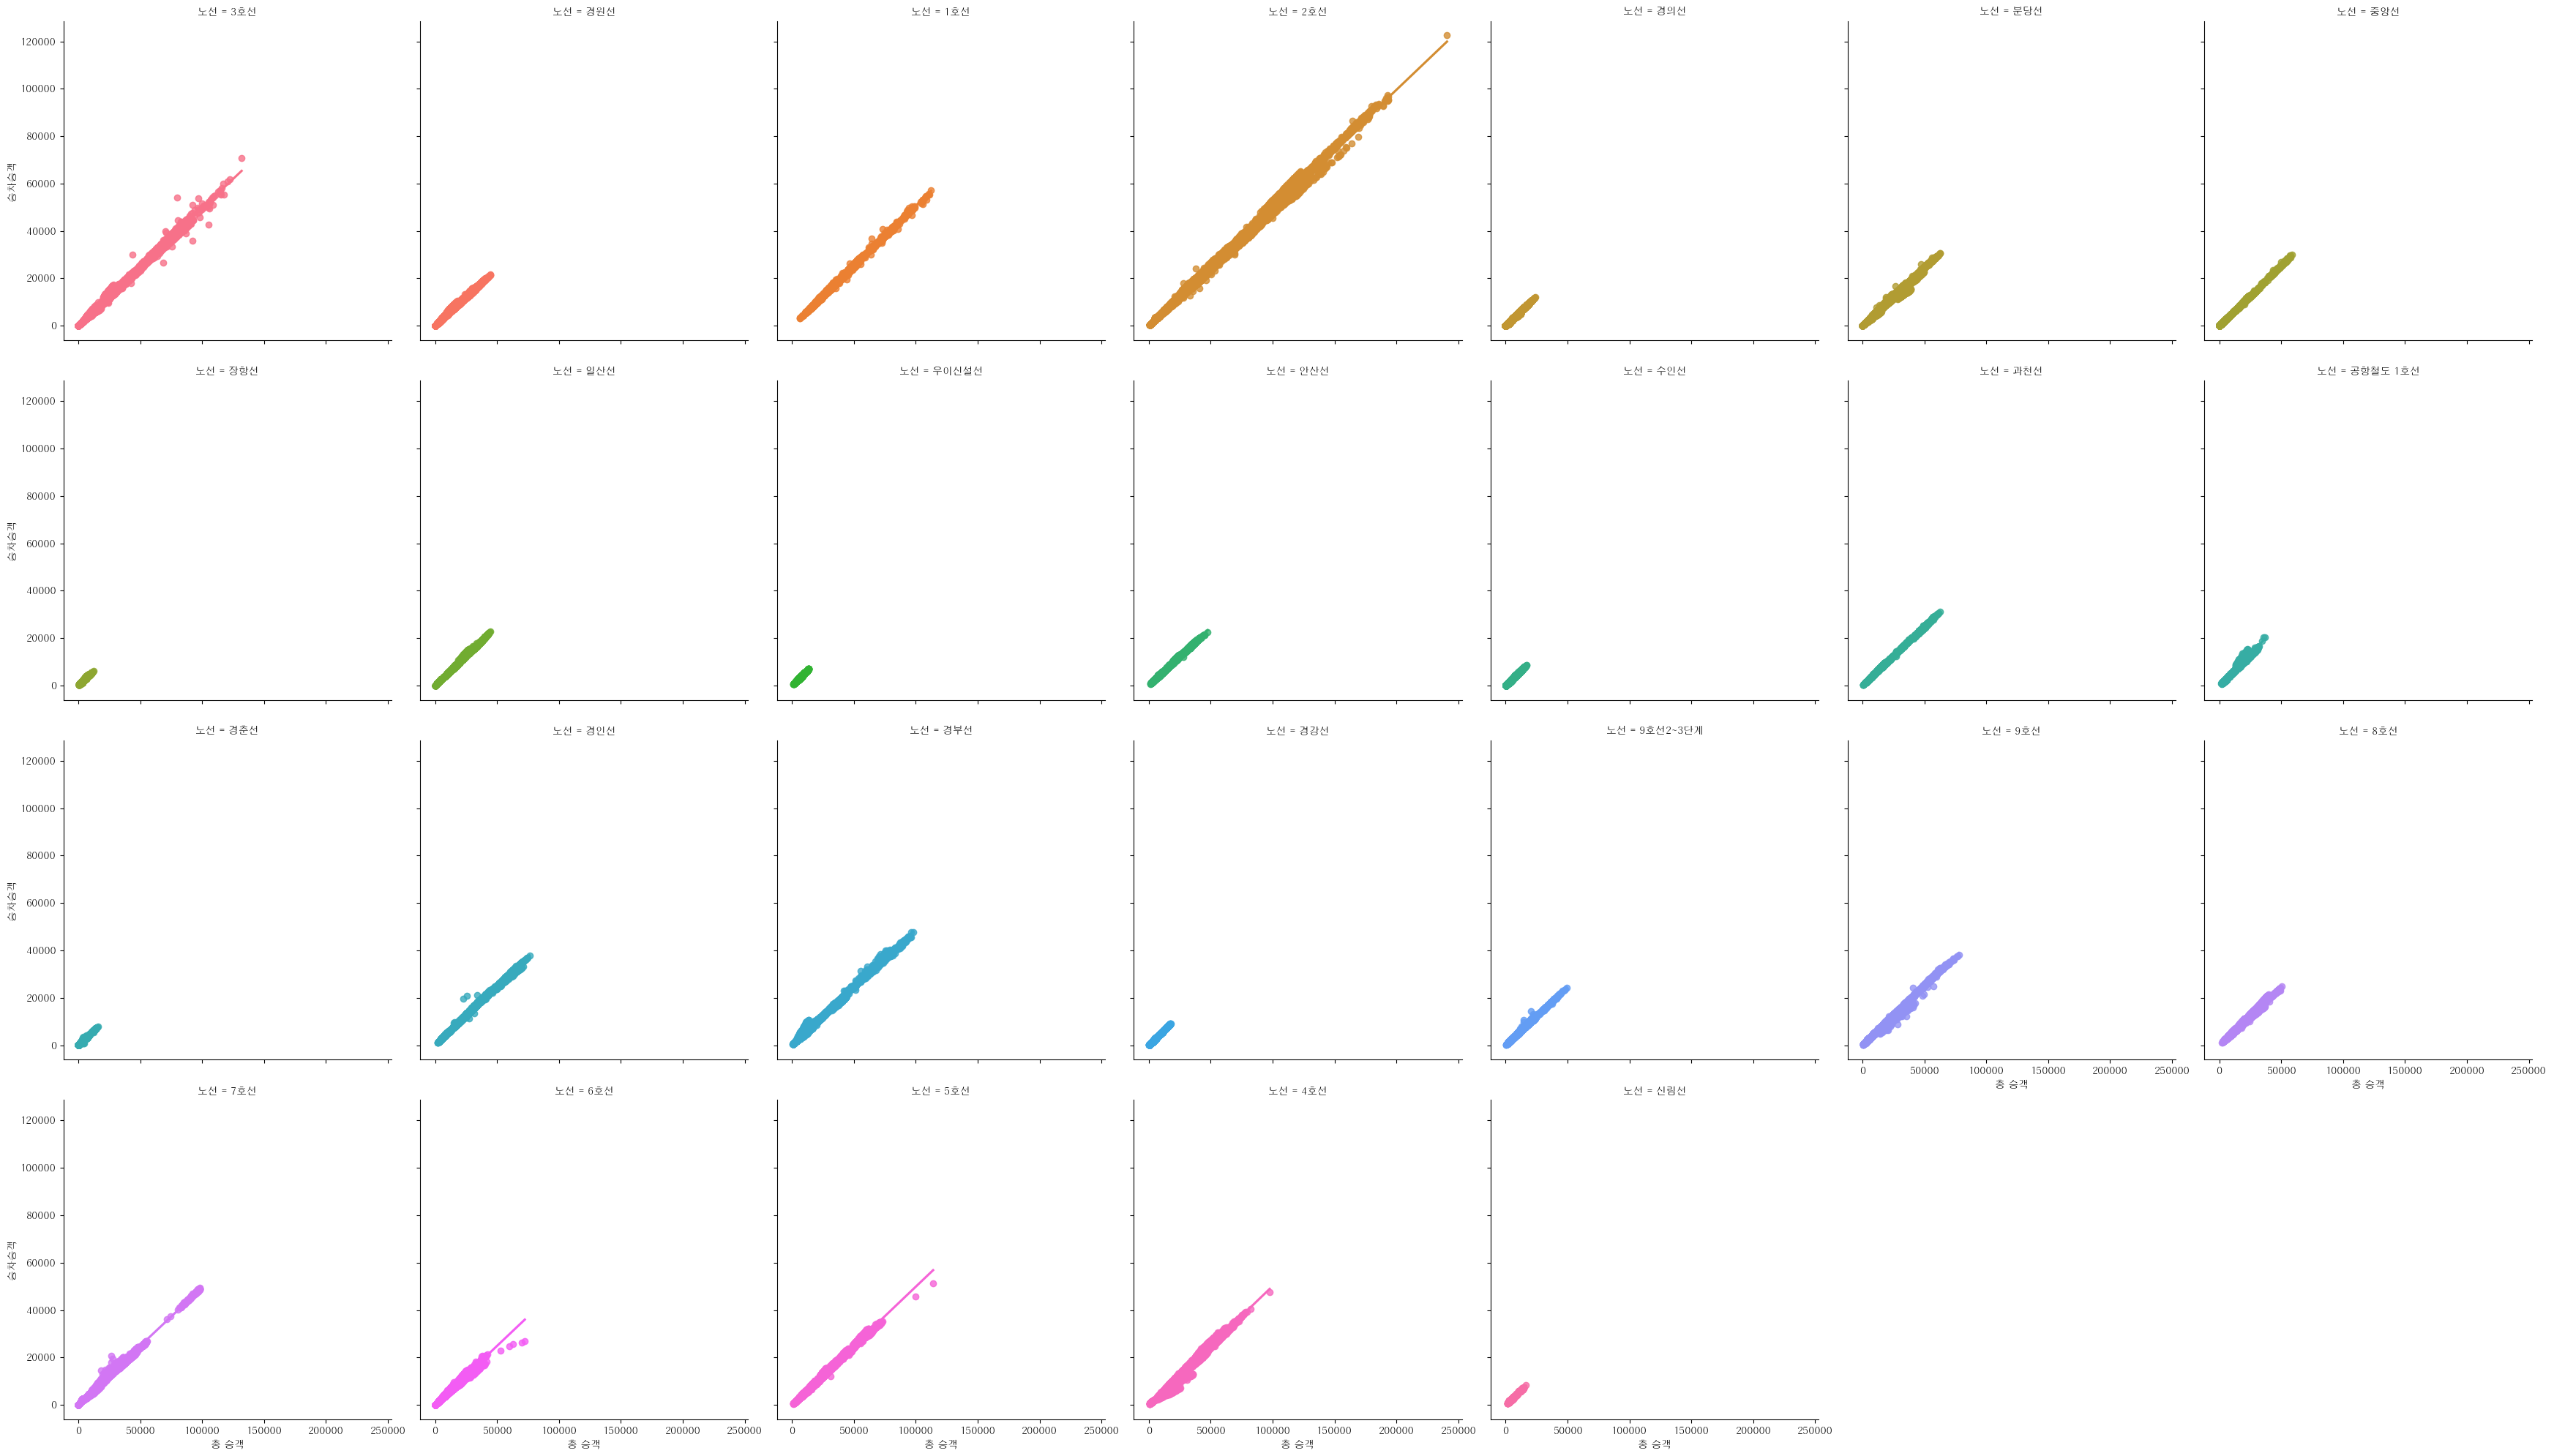

In [19]:
sns.lmplot(data=df9, x="총 승객", y="승차승객", hue="노선", col="노선", col_wrap=7)

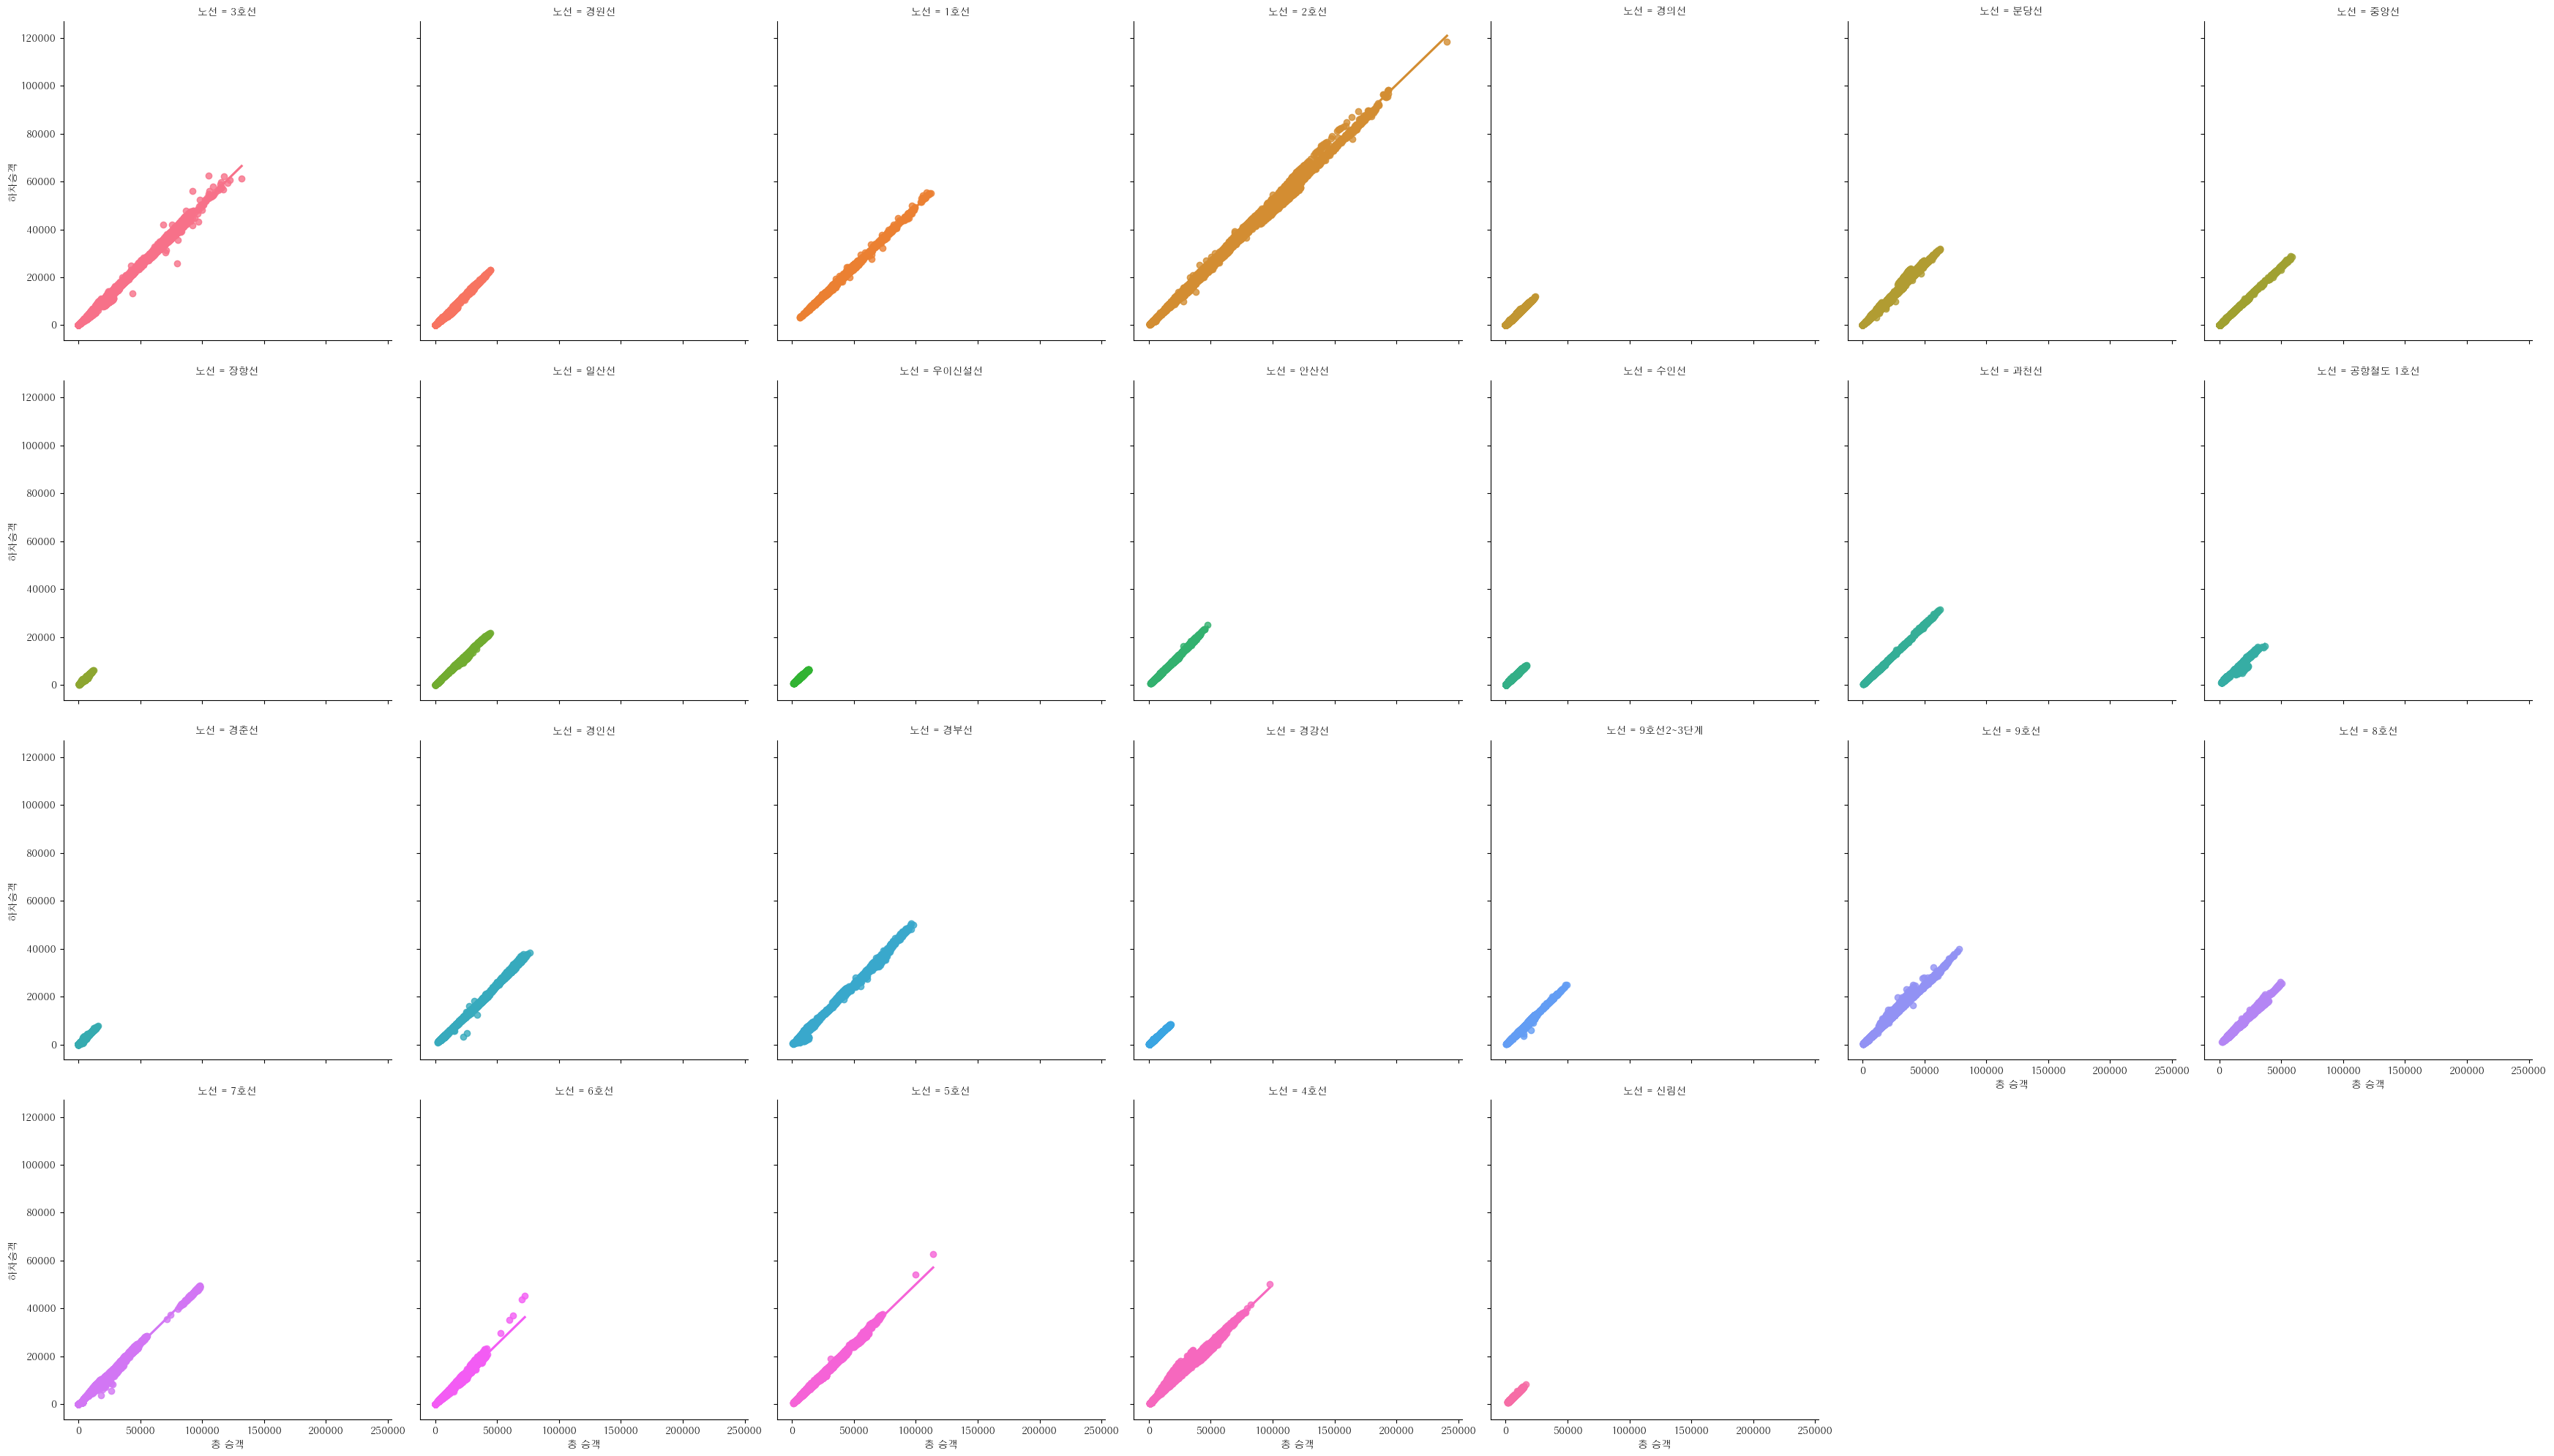

In [20]:
sns.lmplot(data=df9, x="총 승객", y="하차승객", hue="노선", col="노선", col_wrap=7)

### 그래프 결과
 - 승객이 많은 노선과 적은 노선의 차이가 명확하게 드러남을 알 수 있다

### 노선별 역의 수

In [21]:
line_name = np.sort(df9.노선.unique())
line_code = pd.DataFrame(list(enumerate(line_name)), columns=['노선코드','노선'])
line_code

,노선코드,노선
0,0,1호선
1,1,2호선
2,2,3호선
3,3,4호선
4,4,5호선
5,5,6호선
6,6,7호선
7,7,8호선
8,8,9호선
9,9,9호선2~3단계


In [22]:
s = df9[['노선', '역']].drop_duplicates().노선.value_counts()
line_code['역수'] = line_code.노선.map(s)
line_code

,노선코드,노선,역수
0,0,1호선,10
1,1,2호선,50
2,2,3호선,34
3,3,4호선,26
4,4,5호선,56
5,5,6호선,39
6,6,7호선,51
7,7,8호선,18
8,8,9호선,25
9,9,9호선2~3단계,13


### 워드 클라우드로 표현

In [24]:
wc=line_code.set_index("노선").to_dict()["역수"]

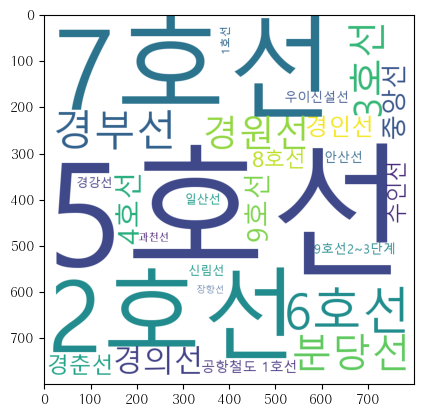

In [25]:
wordcloud = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250, background_color="white")
gen =wordcloud.generate_from_frequencies(wc)
plt.figure()
plt.imshow(gen)

### 그 외 데이터 및 그래프

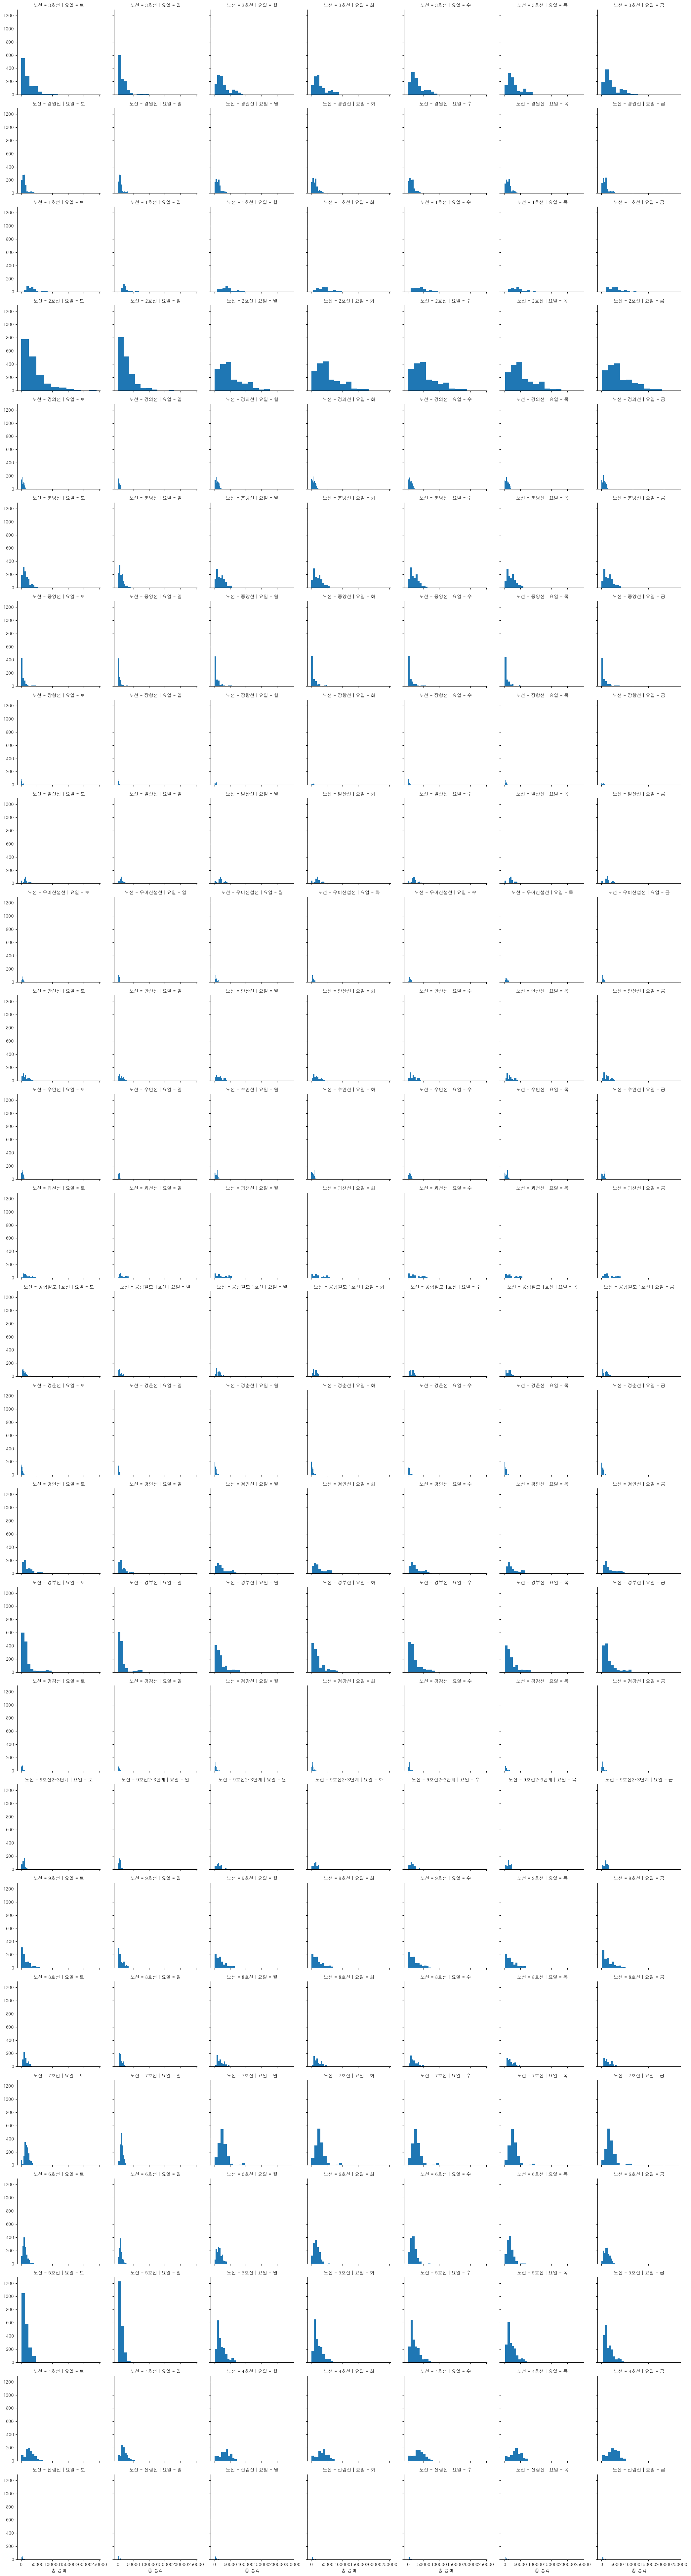

In [26]:
g=sns.FacetGrid(df9, row="노선", col="요일")
g.map(plt.hist, "총 승객")

In [27]:
df9a=df9.pivot_table(index="월", columns="노선", values="총 승객")
df9a

노선,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선,9호선2~3단계,...,공항철도 1호선,과천선,분당선,수인선,신림선,안산선,우이신설선,일산선,장항선,중앙선
월,,,,,,,,,,,,,,,,,,,,,
1,35196.625806,43653.232903,24383.783862,29437.203474,18055.775346,13663.841474,20945.650215,16855.062724,17813.563871,11662.337469,...,11004.529954,19960.165323,17423.384255,5081.691756,NaN,14464.982630,5468.786600,16428.866044,2809.474654,6745.542243
2,32398.550000,40774.674286,22898.817021,27653.245879,16962.439413,12963.789174,19951.843028,15775.049603,16610.682857,11015.024725,...,10342.211735,18597.991071,16272.207900,4790.833333,NaN,13578.607143,5277.629121,15901.947183,2770.117347,6453.175170
3,33276.367742,41767.422581,23151.466859,28874.148883,17405.872696,13553.235495,21355.996283,16236.259857,16689.815484,10955.218362,...,10438.414747,19407.415323,16815.561502,5327.740143,NaN,15026.724566,5512.449132,16220.462264,3816.096774,6875.219662
4,39388.526667,48533.842000,26912.061204,33158.924359,20305.444048,15544.340407,24920.967033,18887.494444,19853.649333,12913.566667,...,12502.252381,23723.575000,19520.956268,6262.320370,NaN,17443.133333,6242.748718,18908.550820,4417.038095,8197.758730
5,42815.854839,51541.072903,29270.865201,35861.838710,21311.559332,16655.410562,26390.007628,19506.910394,20800.927742,13771.838710,...,13884.562212,25646.935484,20700.681989,6708.229391,6418.000000,18588.818859,6670.260546,20363.369427,4894.433180,8784.062980
6,41943.436667,50286.223333,28387.732938,34554.153846,20791.584524,16154.348940,25492.059335,19131.672222,20492.433333,14060.756410,...,13920.595238,24134.850000,20022.055233,6301.644444,5540.863636,17508.084615,6365.220513,19257.252427,4326.352381,8391.022222
7,41221.409677,50325.717419,27736.885687,33493.224566,20369.753456,15612.112436,24783.029839,18747.173835,20313.212903,14215.508685,...,14070.096774,23636.975806,19629.193639,5831.430108,5792.123167,16597.521092,6187.972705,18932.487500,3724.488479,8088.448541
8,39982.038710,48244.368387,26710.286538,32250.519851,19901.368664,15038.180426,23861.742944,18129.569892,19587.423226,13695.493797,...,13836.605991,22249.455645,19013.088263,5599.274194,5831.709677,15814.990074,5896.263027,18261.798107,3598.456221,7709.950845
